In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("churn_prediction.csv")

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
data.shape

(28382, 21)

In [368]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [369]:
temp=pd.DataFrame({"null_values":data.isnull().sum(),"data_types":data.dtypes,"number_of_Unique Values":data.nunique()})

In [370]:
temp

,null_values,data_types,number_of_Unique Values
customer_id,0,int64,28382
vintage,0,int64,5473
age,0,int64,90
gender,525,object,2
dependents,2463,float64,15
occupation,80,object,5
city,803,float64,1604
customer_nw_category,0,int64,3
branch_code,0,int64,3185
days_since_last_transaction,3223,float64,360


In [371]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [372]:
data.describe(include="all")

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


## Univariste Analysis

Text(0.5, 0, 'vinatage values')

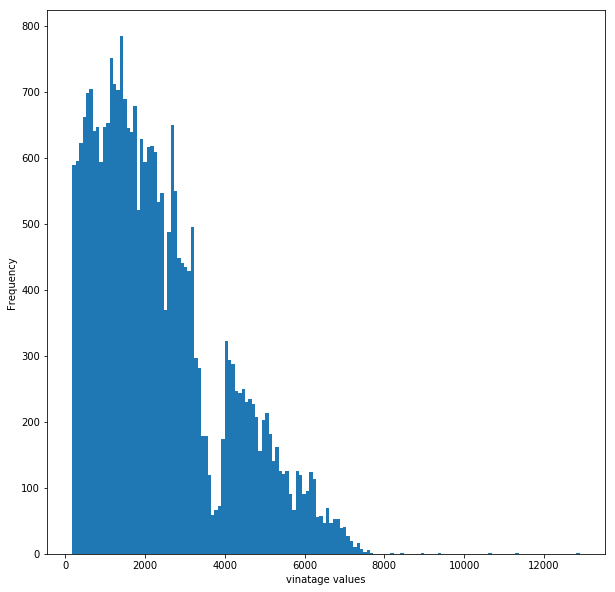

In [373]:
plt.figure(figsize=(10,10))
data["vintage"].plot.hist(bins=150)
plt.xlabel("vinatage values")

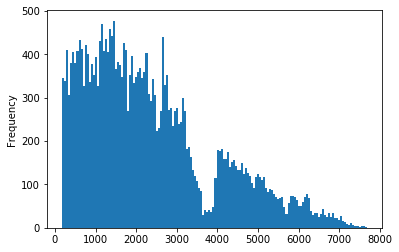

In [374]:
data["vintage"].loc[data.vintage <= 8000].plot.hist(bins=150)

Text(0.5, 0, 'vinatage values')

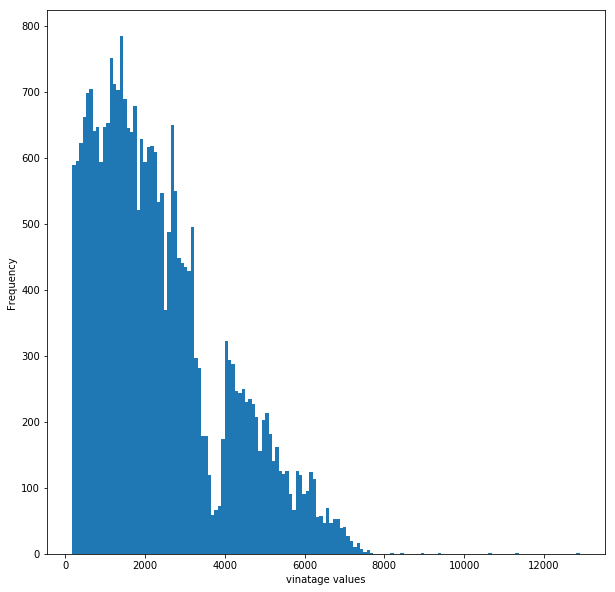

In [375]:
plt.figure(figsize=(10,10))
data["vintage"].plot.hist(bins=150)
plt.xlabel("vinatage values")

In [376]:
# the above graph is kind of left skewed 
# thus we will perform skewed operations(variable tranfornmation) 

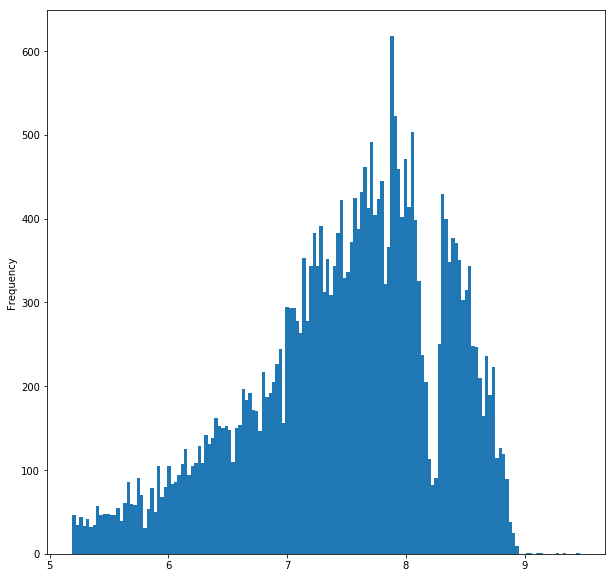

In [377]:
plt.figure(figsize=(10,10))
np.log(data["vintage"]).plot.hist(bins=150)

Text(0.5, 0, 'vinatage values')

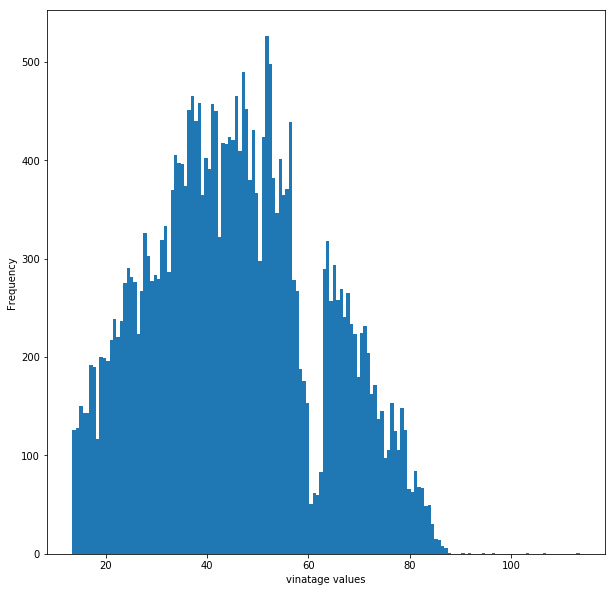

In [378]:
plt.figure(figsize=(10,10))
np.sqrt(data["vintage"]).plot.hist(bins=150)
plt.xlabel("vinatage values")

Text(0.5, 0, 'vinatage values')

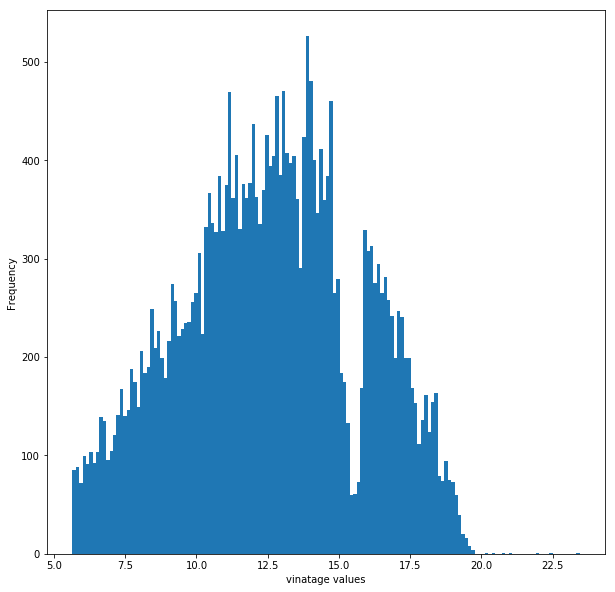

In [379]:
plt.figure(figsize=(10,10))
np.power(data["vintage"],1/3).plot.hist(bins=150)
plt.xlabel("vinatage values")

Text(0.5, 0, 'vinatage values')

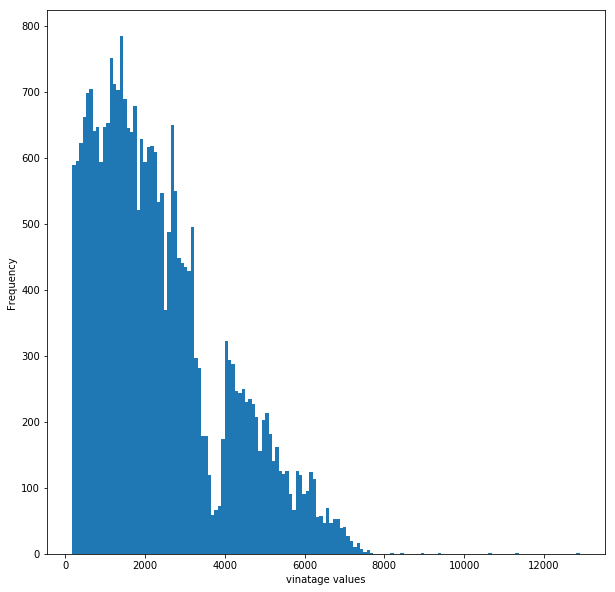

In [380]:
plt.figure(figsize=(10,10))
data["vintage"].plot.hist(bins=150)
plt.xlabel("vinatage values")

Text(0.5, 0, 'age values')

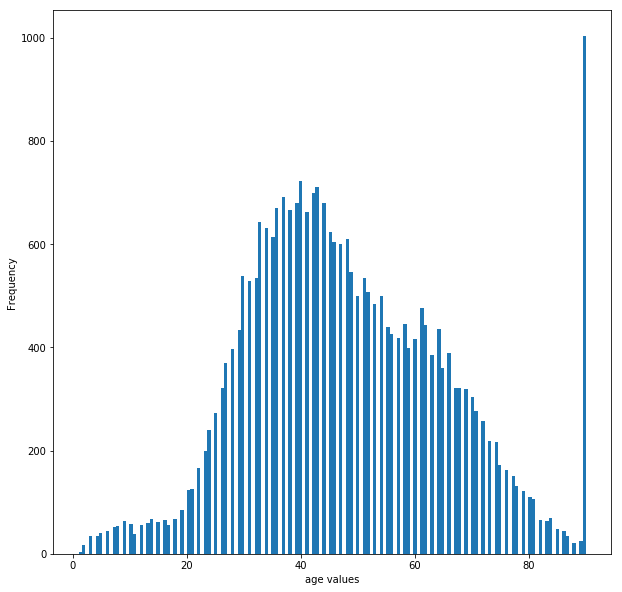

In [381]:
plt.figure(figsize=(10,10))
data["age"].plot.hist(bins=150)
plt.xlabel("age values")

Text(0.5, 0, 'city values')

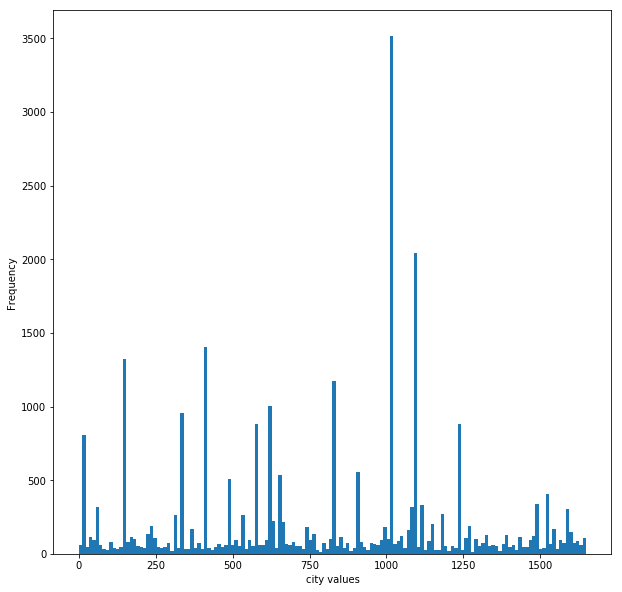

In [382]:
plt.figure(figsize=(10,10))
data["city"].plot.hist(bins=150)
plt.xlabel("city values")

Text(0.5, 0, 'barch code values')

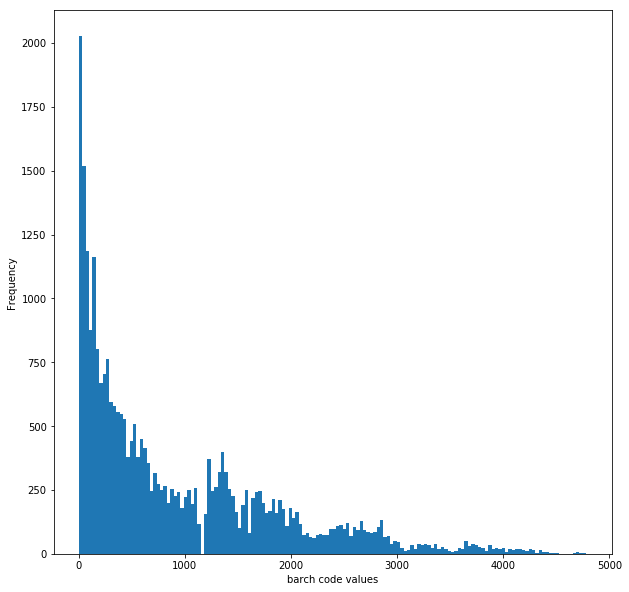

In [383]:
plt.figure(figsize=(10,10))
data["branch_code"].plot.hist(bins=150)
plt.xlabel("barch code values")

Text(0.5, 0, 'vinatage values')

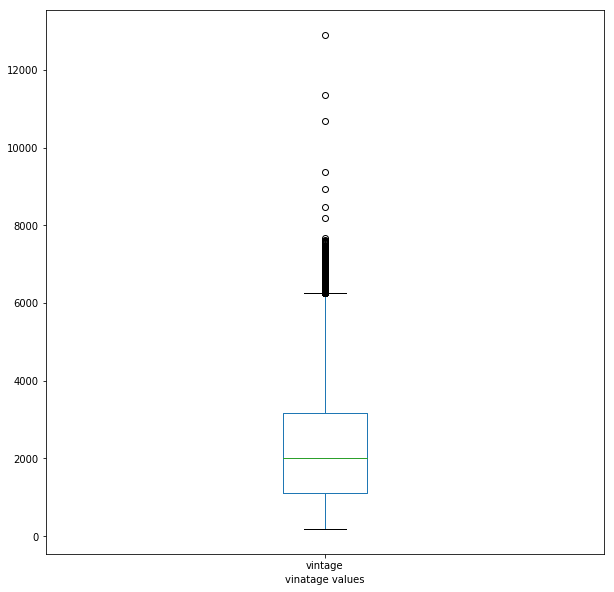

In [384]:
plt.figure(figsize=(10,10))
data["vintage"].plot.box()
plt.xlabel("vinatage values")

Text(0.5, 0, 'days since last transaction values')

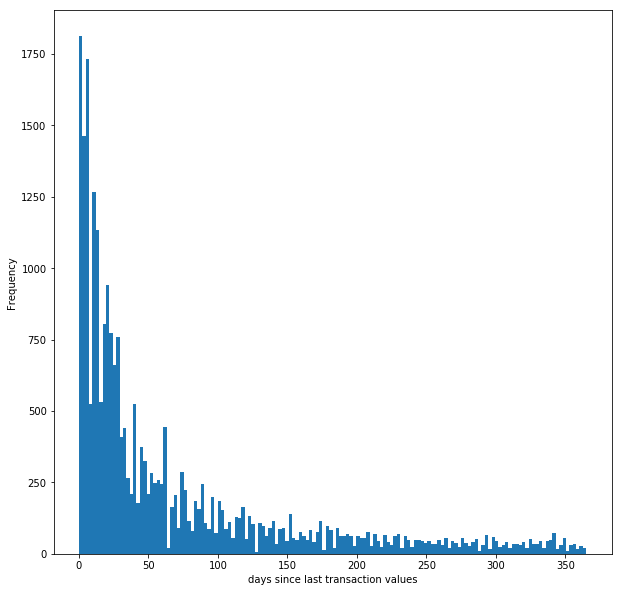

In [385]:
plt.figure(figsize=(10,10))
data["days_since_last_transaction"].plot.hist(bins=150)
plt.xlabel("days since last transaction values")

In [386]:
temp

,null_values,data_types,number_of_Unique Values
customer_id,0,int64,28382
vintage,0,int64,5473
age,0,int64,90
gender,525,object,2
dependents,2463,float64,15
occupation,80,object,5
city,803,float64,1604
customer_nw_category,0,int64,3
branch_code,0,int64,3185
days_since_last_transaction,3223,float64,360


Text(0.5, 0, 'current balance values')

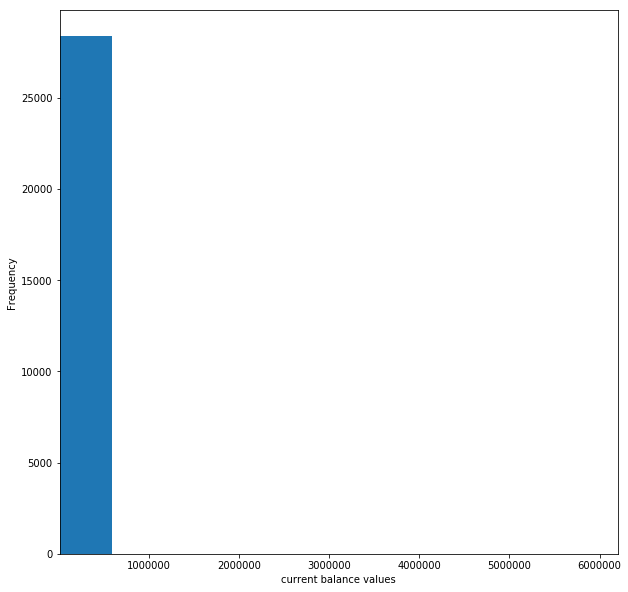

In [387]:
plt.figure(figsize=(10,10))
data["current_balance"].plot.hist()
plt.xlim(10000)
plt.xlabel("current balance values")

Text(0.5, 0, 'current balance values')

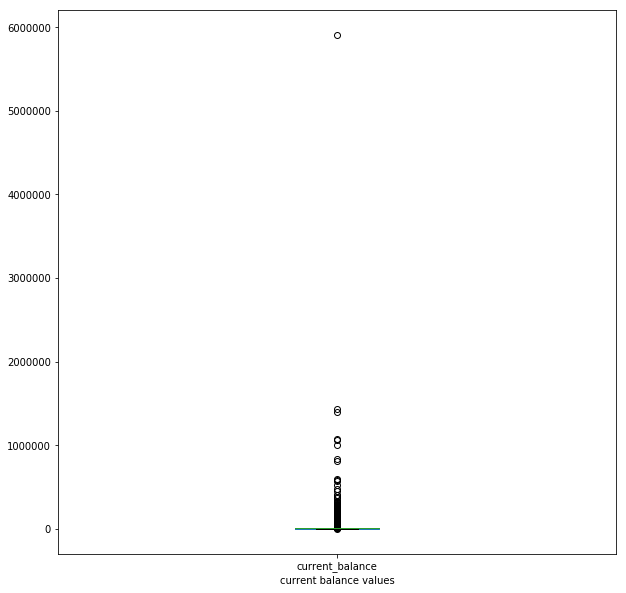

In [388]:
plt.figure(figsize=(10,10))
data["current_balance"].plot.box()
plt.xlabel("current balance values")

In [389]:
data["current_balance"].value_counts()

1429.07     6
1428.73     5
1429.14     4
1428.79     4
1428.94     4
1429.20     4
1428.76     4
1428.93     4
2824.23     3
1797.24     3
1429.21     3
1429.19     3
1428.67     3
1428.83     3
1428.89     3
1429.17     3
1428.70     3
0.06        3
1429.09     3
1602.05     3
2259.06     2
1428.87     2
1730.63     2
1575.16     2
2317.78     2
1855.51     2
567.82      2
3766.38     2
1896.58     2
4840.43     2
           ..
4123.43     1
811.25      1
5225.48     1
6454.83     1
2742.53     1
1384.93     1
2674.16     1
3255.27     1
8453.37     1
3808.66     1
2910.12     1
406.13      1
963.46      1
145.62      1
1869.52     1
673.24      1
3490.74     1
897.90      1
385.05      1
2014.76     1
44516.99    1
13026.42    1
1886.91     1
5066.35     1
12855.37    1
970.41      1
7707.93     1
10931.00    1
6091.23     1
7.50        1
Name: current_balance, Length: 27903, dtype: int64

(0, 1000000)

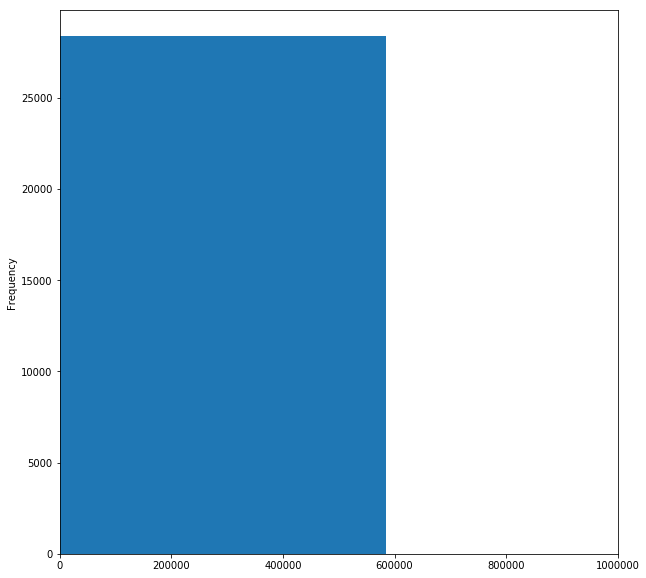

In [390]:
plt.figure(figsize=(10,10))
data["current_balance"].plot.hist()
plt.xlim(0,1000000)

In [391]:
x=data.current_balance.unique

In [392]:
x

<bound method Series.unique of 0         1458.71
1         5390.37
2         3913.16
3         2291.91
4          927.72
5        15202.20
6         7006.93
7        10096.58
8         1355.86
9         4957.95
10        1928.76
11        6886.40
12         554.38
13        4548.48
14        5431.42
15        2010.98
16        1448.49
17        5292.13
18        3507.71
19        3042.70
20           2.18
21        4792.60
22        8358.47
23        2497.52
24        2596.21
25       14289.26
26       20273.43
27        7111.29
28        6424.46
29        6152.67
           ...   
28352     6636.39
28353     1591.98
28354    21974.54
28355    21824.08
28356    10701.89
28357     8374.17
28358     4884.56
28359     3893.57
28360     4825.45
28361      685.07
28362     6503.62
28363     7422.94
28364     3453.68
28365     2321.35
28366     2128.52
28367    10034.12
28368      323.71
28369     1526.60
28370     5248.95
28371     1962.74
28372      197.83
28373     2554.37
28374     7713.

In [393]:
data.current_balance.value_counts()

1429.07     6
1428.73     5
1429.14     4
1428.79     4
1428.94     4
1429.20     4
1428.76     4
1428.93     4
2824.23     3
1797.24     3
1429.21     3
1429.19     3
1428.67     3
1428.83     3
1428.89     3
1429.17     3
1428.70     3
0.06        3
1429.09     3
1602.05     3
2259.06     2
1428.87     2
1730.63     2
1575.16     2
2317.78     2
1855.51     2
567.82      2
3766.38     2
1896.58     2
4840.43     2
           ..
4123.43     1
811.25      1
5225.48     1
6454.83     1
2742.53     1
1384.93     1
2674.16     1
3255.27     1
8453.37     1
3808.66     1
2910.12     1
406.13      1
963.46      1
145.62      1
1869.52     1
673.24      1
3490.74     1
897.90      1
385.05      1
2014.76     1
44516.99    1
13026.42    1
1886.91     1
5066.35     1
12855.37    1
970.41      1
7707.93     1
10931.00    1
6091.23     1
7.50        1
Name: current_balance, Length: 27903, dtype: int64

In [394]:
data.current_balance=data.current_balance.round()

(0, 30000)

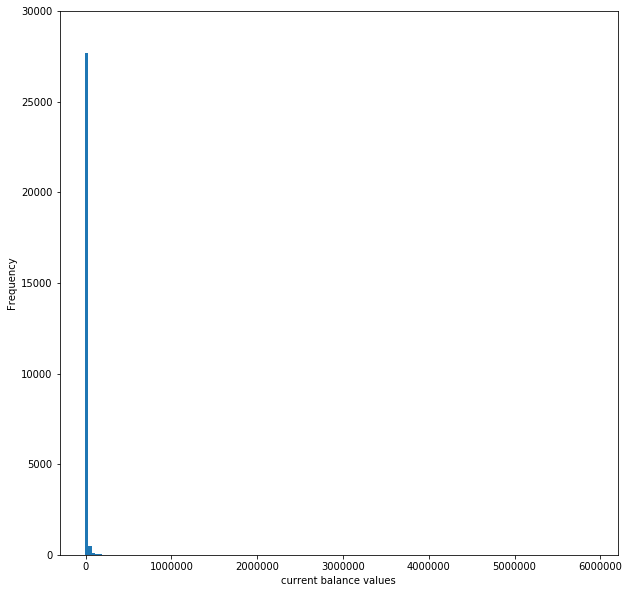

In [395]:
plt.figure(figsize=(10,10))
data["current_balance"].plot.hist(bins=150)
plt.xlabel("current balance values")
plt.ylim(0,30000)

In [396]:
data.current_balance.value_counts()

1429.0      101
1.0          26
0.0          21
2871.0       16
1462.0       15
1437.0       15
1611.0       14
1622.0       14
1460.0       14
1498.0       14
2450.0       14
1650.0       14
1454.0       14
2.0          13
1873.0       13
18.0         13
1465.0       13
1554.0       13
149.0        13
1430.0       13
1487.0       13
2148.0       12
1440.0       12
1525.0       12
1598.0       12
1815.0       12
1552.0       12
1609.0       12
72.0         12
2111.0       12
           ... 
17893.0       1
4786.0        1
728.0         1
25236.0       1
37822.0       1
28125.0       1
13901.0       1
37819.0       1
12486.0       1
16063.0       1
19934.0       1
4171.0        1
7885.0        1
7525.0        1
20408.0       1
21042.0       1
23161.0       1
52161.0       1
21208.0       1
32554.0       1
12935.0       1
13012.0       1
3791.0        1
815324.0      1
20870.0       1
16142.0       1
9257.0        1
419.0         1
474.0         1
15879.0       1
Name: current_balance, L

In [397]:
temp

,null_values,data_types,number_of_Unique Values
customer_id,0,int64,28382
vintage,0,int64,5473
age,0,int64,90
gender,525,object,2
dependents,2463,float64,15
occupation,80,object,5
city,803,float64,1604
customer_nw_category,0,int64,3
branch_code,0,int64,3185
days_since_last_transaction,3223,float64,360


(0, 30000)

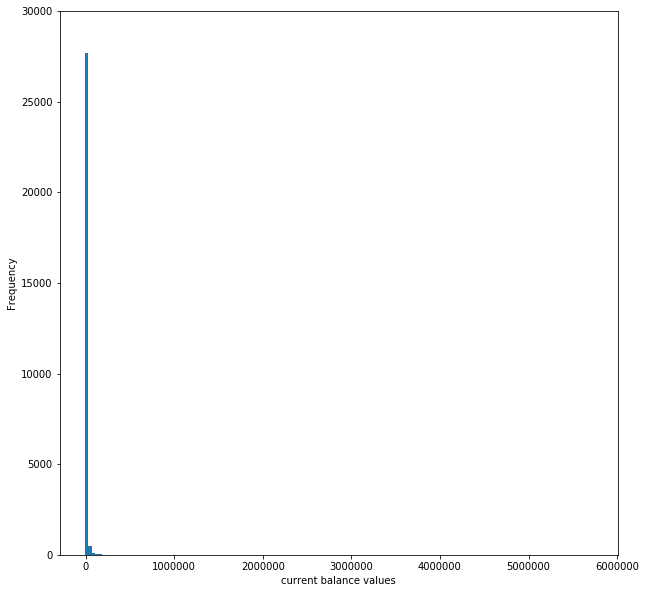

In [398]:
plt.figure(figsize=(10,10))
data["previous_month_balance"].plot.hist(bins=150)
plt.xlabel("current balance values")
plt.ylim(0,30000)

## For categorical variables

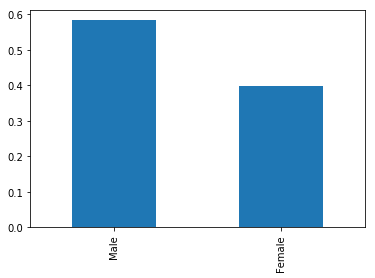

In [399]:
(data["gender"].value_counts()/len(data)).plot.bar()

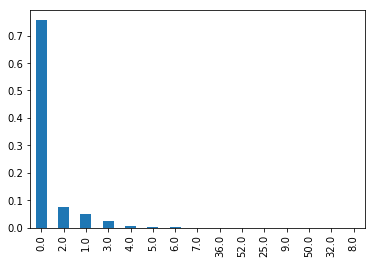

In [400]:
(data["dependents"].value_counts()/len(data)).plot.bar() ## although its a continous variable

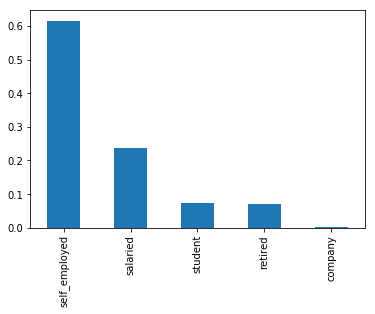

In [401]:
(data["occupation"].value_counts()/len(data)).plot.bar() 

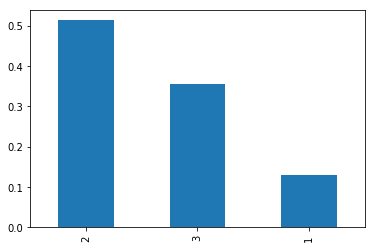

In [402]:
(data["customer_nw_category"].value_counts()/len(data)).plot.bar() 

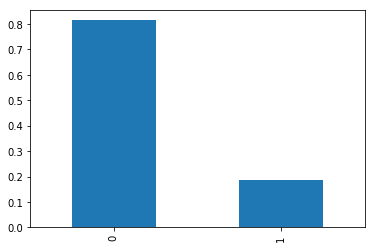

In [403]:
(data["churn"].value_counts()/len(data)).plot.bar() 

# Now before moving to bivariate analysis we will actually manupulate the data

In [404]:
temp

,null_values,data_types,number_of_Unique Values
customer_id,0,int64,28382
vintage,0,int64,5473
age,0,int64,90
gender,525,object,2
dependents,2463,float64,15
occupation,80,object,5
city,803,float64,1604
customer_nw_category,0,int64,3
branch_code,0,int64,3185
days_since_last_transaction,3223,float64,360


In [405]:
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [406]:
data.gender.unique()

array(['Male', nan, 'Female'], dtype=object)

In [407]:
data.gender.fillna(value=data.gender.mode()[0],inplace=True)

In [408]:
data.dependents.unique()

array([ 0., nan,  2.,  3.,  1.,  7.,  4.,  6.,  5.,  9., 52., 36., 50.,
        8., 25., 32.])

In [409]:
data.dependents.fillna(value=data.dependents.mode()[0],inplace=True)

In [410]:
data.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [411]:
data.occupation.fillna(value=data.occupation.mode()[0],inplace=True)

In [412]:
data.occupation.unique()

array(['self_employed', 'salaried', 'retired', 'student', 'company'],
      dtype=object)

In [413]:
data.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
1271.0     150
1076.0     133
745.0      130
996.0      119
621.0      114
          ... 
1179.0       1
1421.0       1
973.0        1
847.0        1
1001.0       1
1279.0       1
1137.0       1
1245.0       1
1594.0       1
948.0        1
1026.0       1
1166.0       1
1545.0       1
808.0        1
503.0        1
1300.0       1
1605.0       1
824.0        1
607.0        1
1011.0       1
728.0        1
1207.0       1
566.0        1
972.0        1
1448.0       1
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [414]:
data.city.nunique()

1604

In [415]:
data.city.fillna(value=0.0,inplace=True)

In [416]:
data.city.unique()

array([ 187.,    0.,  146., ...,  556., 1167.,  723.])

In [417]:
data.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
0.0        819
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1271.0     150
1181.0     150
1076.0     133
745.0      130
996.0      119
          ... 
293.0        1
652.0        1
121.0        1
5.0          1
98.0         1
581.0        1
1350.0       1
1101.0       1
158.0        1
265.0        1
20.0         1
588.0        1
1079.0       1
629.0        1
527.0        1
842.0        1
1212.0       1
530.0        1
1166.0       1
375.0        1
559.0        1
1462.0       1
1594.0       1
1217.0       1
556.0        1
83.0         1
636.0        1
359.0        1
1627.0       1
1313.0       1
Name: city, Length: 1604, dtype: int64

In [418]:
data.days_since_last_transaction.unique()

array([224.,  60.,  nan, 147.,  58.,  98., 172.,  19.,   0.,   5.,  20.,
        47., 303.,  52.,   3.,  69.,  31.,  23.,  13.,   4.,   9.,  27.,
        36.,  77., 125.,  10.,  97.,  61.,  26., 100.,   7.,  11., 160.,
        14.,  95.,  17., 116.,  76.,  18.,  28.,  25., 173.,  46.,  12.,
         6., 138., 126.,  49., 230.,  45.,  75., 219.,  70.,  30., 180.,
        39., 259., 188., 328.,  81., 297.,  63., 174.,  96.,  32., 102.,
        40., 164., 110., 231.,  87.,  35.,  86.,  48., 129., 205., 359.,
       257.,  21., 132., 209.,  53.,  24., 171., 135., 149., 286., 137.,
       341., 168., 200., 108., 308.,  38., 227.,  55.,  68., 109., 118.,
       357.,  72., 103., 258., 124.,  62.,  56.,  89.,  91., 146., 250.,
        44.,  41., 151., 123.,  85., 117.,  90., 350., 115.,  29.,  88.,
       319., 299., 307.,  79., 152., 292., 167., 237., 186.,  54.,  42.,
        16.,  73.,   1.,  80., 163., 162., 212., 298., 287., 165., 119.,
        59., 153., 233.,  71., 320.,  33., 313.,  8

In [419]:
data.days_since_last_transaction.mean()

69.99781390357327

In [420]:
data.days_since_last_transaction.dtypes

dtype('float64')

In [421]:
data["days_since_last_transaction"]=data["days_since_last_transaction"].fillna(value=-1)

In [422]:
data=data.astype({"days_since_last_transaction":"int64"})

In [423]:
data["days_since_last_transaction"]=data["days_since_last_transaction"].replace(-1,np.nan)

In [424]:
data.days_since_last_transaction.mean()

69.99781390357327

In [427]:
data.days_since_last_transaction.fillna(value=70,inplace=True)

In [428]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [429]:
data.occupation.value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

## Now we will look at bivariate Analysis

In [430]:
temp

,null_values,data_types,number_of_Unique Values
customer_id,0,int64,28382
vintage,0,int64,5473
age,0,int64,90
gender,525,object,2
dependents,2463,float64,15
occupation,80,object,5
city,803,float64,1604
customer_nw_category,0,int64,3
branch_code,0,int64,3185
days_since_last_transaction,3223,float64,360


# first we will look at cont cont variable

Text(0, 0.5, 'Vintage Values')

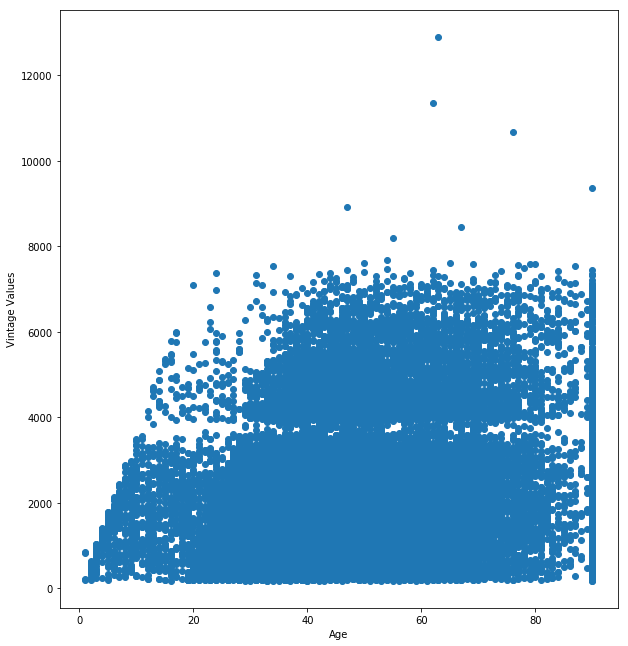

In [433]:
plt.figure(figsize=(10,11))
plt.scatter(data.age,data.vintage)
plt.xlabel("Age")
plt.ylabel("Vintage Values")

Text(0, 0.5, 'Dependent Values')

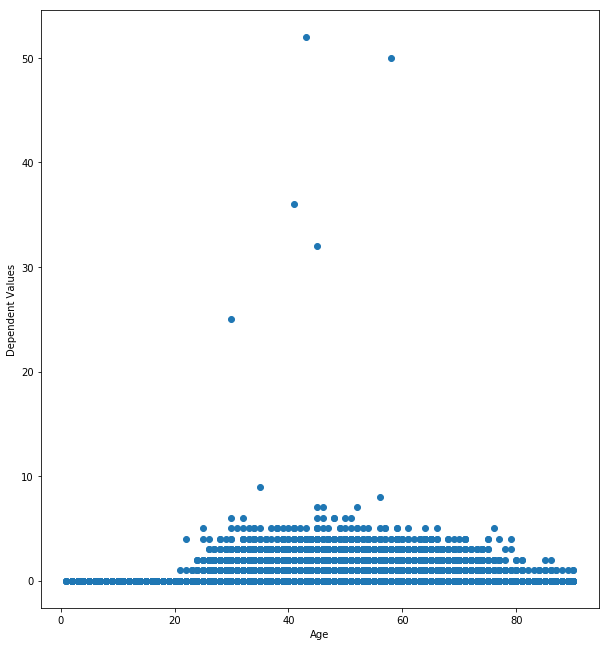

In [435]:
plt.figure(figsize=(10,11))
plt.scatter(data.age,data.dependents)
plt.xlabel("Age")
plt.ylabel("Dependent Values")

Text(0, 0.5, 'days_since_last_trnsction Values')

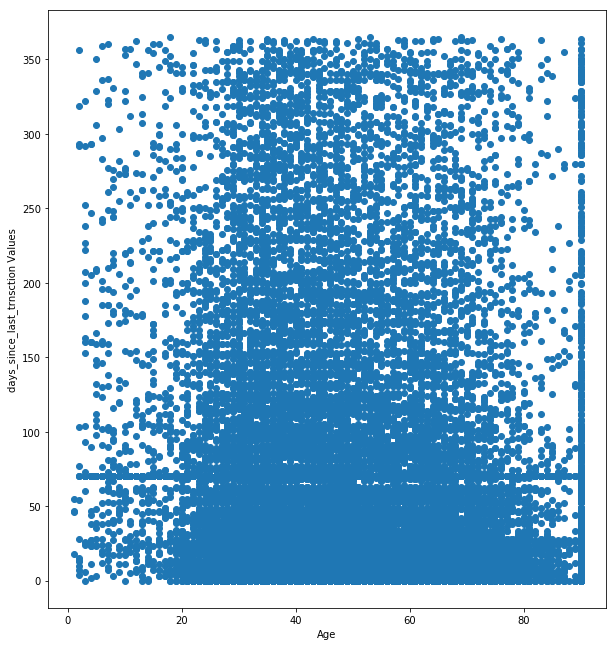

In [437]:
plt.figure(figsize=(10,11))
plt.scatter(data.age,data.days_since_last_transaction)
plt.xlabel("Age")
plt.ylabel("days_since_last_trnsction Values")

Text(0, 0.5, 'Current Main Balance Values')

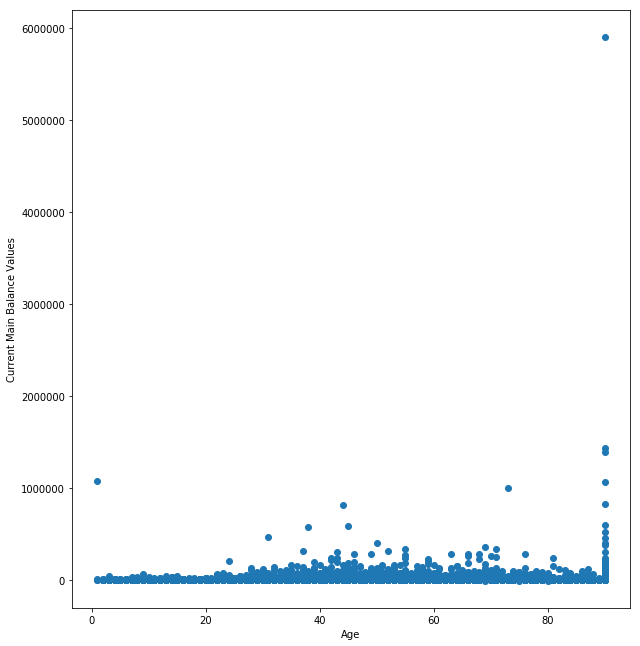

In [439]:
plt.figure(figsize=(10,11))
plt.scatter(data.age,data.current_balance)
plt.xlabel("Age")
plt.ylabel("Current Main Balance Values")

Text(0, 0.5, 'current_balance')

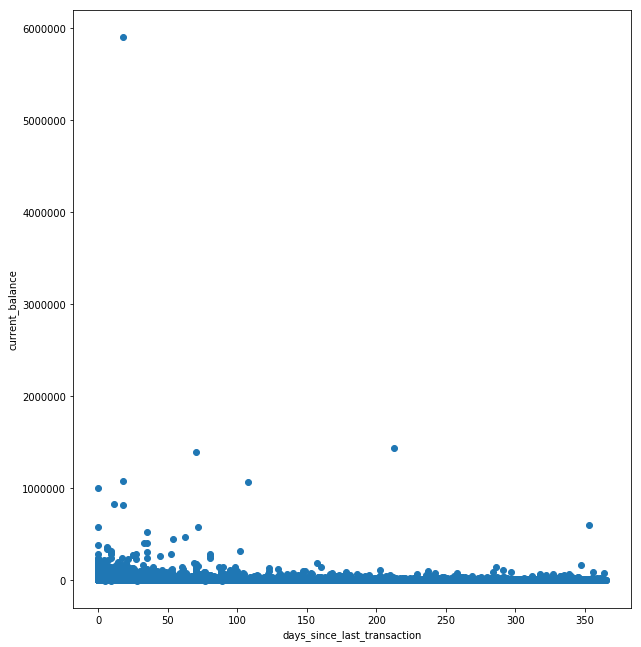

In [441]:
plt.figure(figsize=(10,11))
plt.scatter(data.days_since_last_transaction,data.current_balance)
plt.xlabel("days_since_last_transaction")
plt.ylabel("current_balance")

In [499]:
data.customer_nw_category.unique()

array([2, 3, 1], dtype=int64)

In [500]:
dict1={1:"blue",2:"red",3:"green"}

Text(0.5, 0, 'city')

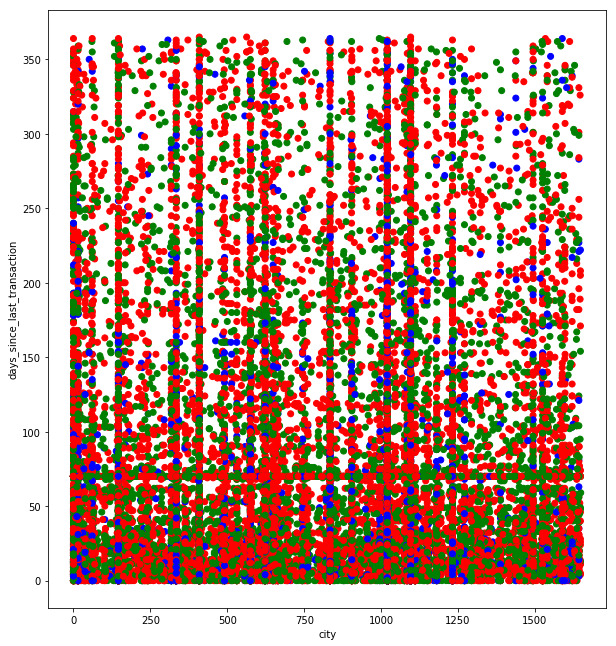

In [501]:
plt.figure(figsize=(10,11))
plt.scatter(data.city,data.days_since_last_transaction,c=data["customer_nw_category"].apply(lambda x: dict1[x]))
plt.ylabel("days_since_last_transaction")
plt.xlabel("city")

Text(0.5, 0, 'city')

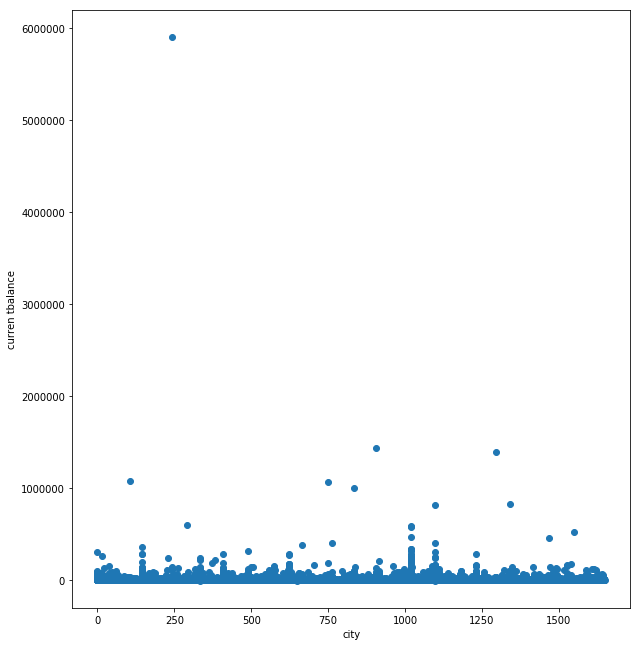

In [446]:
plt.figure(figsize=(10,11))
plt.scatter(data.city,data.current_balance)
plt.ylabel("curren tbalance")
plt.xlabel("city")

In [447]:
data.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.009110,0.000908,0.009618,-0.000286,0.009665,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.068588,0.047667,-0.167366,-0.380714,-0.084282,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,0.001261,0.016692,-0.076532,-0.058990,-0.015311,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.009110,0.068588,0.001261,1.000000,0.004801,0.007917,-0.001704,-0.082712,-0.003838,-0.002181,-0.001786,-0.001967,0.003542,0.025848,0.008225,0.030746,-0.002769,-0.001672,0.029335
city,0.000908,0.047667,0.016692,0.004801,1.000000,-0.003352,-0.071830,-0.007375,-0.003366,-0.001974,-0.004190,-0.006292,0.004955,0.010128,0.002171,0.007385,-0.003524,-0.003834,-0.003783
customer_nw_category,0.009618,-0.167366,-0.076532,0.007917,-0.003352,1.000000,0.235059,0.047040,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,-0.001704,-0.071830,0.235059,1.000000,0.036956,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.009665,-0.084282,-0.015311,-0.082712,-0.007375,0.047040,0.036956,1.000000,-0.019538,-0.014068,-0.012409,-0.006252,-0.033127,-0.071602,-0.039144,-0.070094,-0.017424,-0.011466,-0.053825
current_balance,0.006589,0.002986,0.054346,-0.003838,-0.003366,-0.058314,0.000181,-0.019538,1.000000,0.947276,0.958307,0.714600,0.030371,0.061755,0.044412,0.081248,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,-0.002181,-0.001974,-0.059854,0.000214,-0.014068,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [449]:
data["age"].corr(data["current_balance"])

0.05434622721626286

# now we will look at cont cat variables

In [458]:
data.groupby(["gender"]).age.mean()

gender
Female    46.249536
Male      49.505828
Name: age, dtype: float64

In [474]:
data.groupby(["churn"]).age.mean()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

In [461]:
data.groupby(["churn"]).current_balance.median()

churn
0    3643.0
1    1541.0
Name: current_balance, dtype: float64

Text(0, 0.5, 'Rupees')

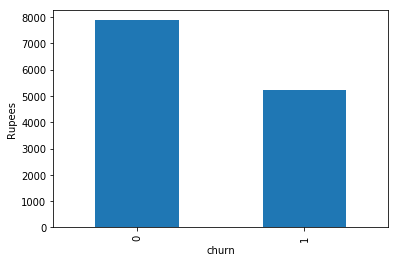

In [465]:
data.groupby(["churn"]).current_balance.mean().plot.bar()
plt.ylabel("Rupees")

we can even perform t_test to calculate the value of p for which we can make a decision 

Text(0, 0.5, 'previous month balance')

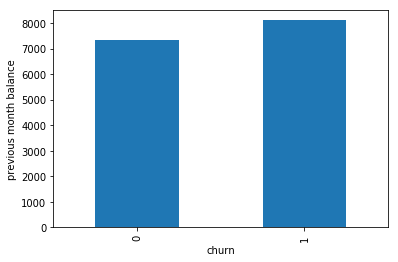

In [469]:
data.groupby(["churn"]).previous_month_end_balance.mean().plot.bar()
plt.ylabel("previous month balance")

In [470]:
data.groupby(["churn"]).current_balance.count()

churn
0    23122
1     5260
Name: current_balance, dtype: int64

In [472]:
data.groupby(["churn"]).previous_month_end_balance.count()

churn
0    23122
1     5260
Name: previous_month_end_balance, dtype: int64

In [483]:
pd.pivot_table(data,values=["age","current_balance","previous_month_end_balance","average_monthly_balance_prevQ","average_monthly_balance_prevQ2","current_month_credit"],index=["churn"],aggfunc="mean")

,age,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_balance,current_month_credit,previous_month_end_balance
churn,,,,,,
0,48.378298,7258.754771,6733.519801,7871.852608,2670.323390,7356.086973
1,47.461217,8543.094684,8841.608291,5220.888593,6786.948224,8109.794051


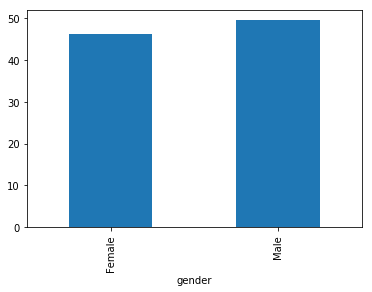

In [480]:
data.groupby(["gender"]).age.mean().plot.bar()

In [485]:
data.groupby(["customer_nw_category"]).current_balance.mean()

customer_nw_category
1    12883.683643
2     7773.280582
3     4795.520965
Name: current_balance, dtype: float64

In [486]:
data.groupby(["customer_nw_category"]).current_balance.median()

customer_nw_category
1    4302.0
2    3646.0
3    2704.5
Name: current_balance, dtype: float64

### AS we can see we are not able to get more insights from cat-cont analysis thus we will look at cat-cat variables

# Now we will look at cat-cat variables

In [490]:
pd.crosstab(data["gender"],data["churn"])

churn,0,1
gender,,
Female,9324,1985
Male,13798,3275


In [491]:
pd.crosstab(data["customer_nw_category"],data["churn"])

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


In [493]:
pd.crosstab(data["occupation"],data["churn"])

churn,0,1
occupation,,
company,36,4
retired,1719,305
salaried,5557,1147
self_employed,14076,3480
student,1734,324


## Above was the complete analysis of the data we had 

# 1>Seggregating the data

In [502]:
x=data.drop(["churn"],axis=1)

In [503]:
x.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1459.0,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2,310,35,Male,0.0,self_employed,0.0,2,3214,60.0,5390.0,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,4,2356,31,Male,0.0,salaried,146.0,2,41,70.0,3913.0,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,2292.0,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,928.0,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16


In [504]:
y=data["churn"]

In [505]:
x.shape,y.shape

((28382, 20), (28382,))

# 2> we'll use et_dummies function as many algo do no accept the categorical data

In [511]:
x=pd.get_dummies(x)

In [512]:
x.shape

(28382, 25)

# 3> using train_test_split

In [513]:
from sklearn.model_selection import train_test_split

In [514]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,stratify=y)

In [515]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 25), (7096, 25), (21286,), (7096,))

# 4> Now we"ll use models to predict the churn

In [516]:
from sklearn.tree import DecisionTreeClassifier
clsfr=DecisionTreeClassifier()
clsfr.fit(train_x,train_y)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(train_x,train_y)
score_test=clsfr.score(test_x,test_y)

In [517]:
score_train,score_test

(1.0, 0.7905862457722661)

In [518]:
train_score=[]
test_score=[]
for i in range(1,25):
    clsfr=DecisionTreeClassifier(max_depth=i)
    clsfr.fit(train_x,train_y)
    # pred_y1=clsfr.predict(test_x,test_y)
    score_train=clsfr.score(train_x,train_y)
    score_test=clsfr.score(test_x,test_y)
    train_score.append(score_train)
    test_score.append(score_test)

Text(0, 0.5, 'SCORE')

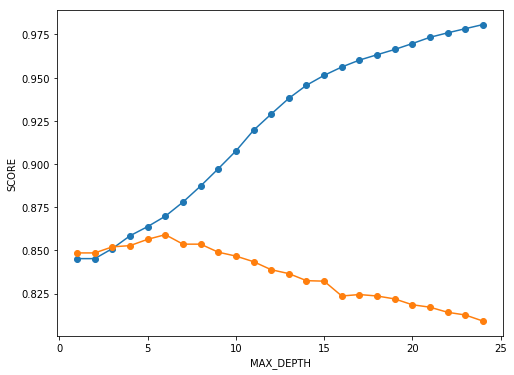

In [519]:
x=range(1,25)
plt.figure(figsize=(8,6))
plt.plot(x,train_score,marker="o")
plt.plot(x,test_score,marker="o")
plt.xlabel("MAX_DEPTH")
plt.ylabel("SCORE")

In [523]:
clsfr=DecisionTreeClassifier(max_depth=7)
clsfr.fit(train_x,train_y)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(train_x,train_y)
score_test=clsfr.score(test_x,test_y)
score_test,score_train

(0.8528748590755355, 0.8780419054777788)

In [524]:
train_score=[]
test_score=[]
for i in range(2,25):
    clsfr=DecisionTreeClassifier(max_depth=7,min_samples_split=i)
    clsfr.fit(train_x,train_y)
    # pred_y1=clsfr.predict(test_x,test_y)
    score_train=clsfr.score(train_x,train_y)
    score_test=clsfr.score(test_x,test_y)
    train_score.append(score_train)
    test_score.append(score_test)

Text(0, 0.5, 'SCORE')

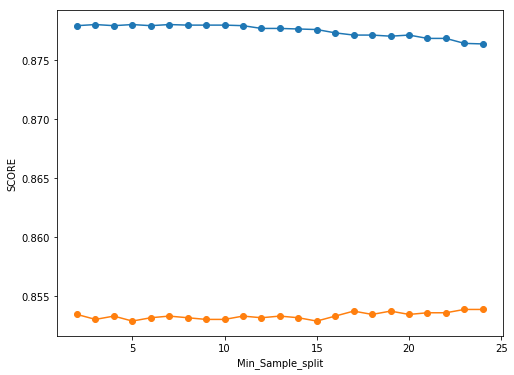

In [525]:
x=range(2,25)
plt.figure(figsize=(8,6))
plt.plot(x,train_score,marker="o")
plt.plot(x,test_score,marker="o")
plt.xlabel("Min_Sample_split")
plt.ylabel("SCORE")

In [526]:
clsfr=DecisionTreeClassifier(max_depth=8,min_samples_split=17)
clsfr.fit(train_x,train_y)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(train_x,train_y)
score_test=clsfr.score(test_x,test_y)
score_test,score_train

(0.8528748590755355, 0.8845720191675279)

In [527]:
train_score=[]
test_score=[]
for i in range(2,50):
    clsfr=DecisionTreeClassifier(max_depth=8,min_samples_split=13,min_samples_leaf=i)
    clsfr.fit(train_x,train_y)
    # pred_y1=clsfr.predict(test_x,test_y)
    score_train=clsfr.score(train_x,train_y)
    score_test=clsfr.score(test_x,test_y)
    train_score.append(score_train)
    test_score.append(score_test)

Text(0, 0.5, 'SCORE')

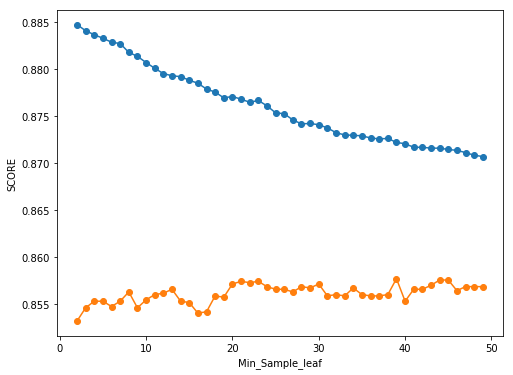

In [528]:
x=range(2,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_score,marker="o")
plt.plot(x,test_score,marker="o")
plt.xlabel("Min_Sample_leaf")
plt.ylabel("SCORE")

In [530]:
clsfr=DecisionTreeClassifier(max_depth=8,min_samples_split=13,min_samples_leaf=39)
clsfr.fit(train_x,train_y)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(train_x,train_y)
score_test=clsfr.score(test_x,test_y)
score_test,score_train

(0.8575253664036077, 0.8721695010805224)

## NOW WE'LL APPLY RANDOM FOREST TO IT

In [531]:
from sklearn.ensemble import RandomForestClassifier

In [532]:
clsfr=RandomForestClassifier()
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9844968523912431, 0.8555524239007892)

In [533]:
## This looks like overfitting

In [534]:
train_list=[]
test_list=[]
for i in range(1,50):
    clsfr=RandomForestClassifier(max_depth=i)
    clsfr.fit(train_x,train_y)
    train_score=clsfr.score(train_x,train_y)
    test_score=clsfr.score(test_x,test_y)
    train_list.append(train_score)
    test_list.append(test_score)

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\f

Text(0, 0.5, 'SCORE')

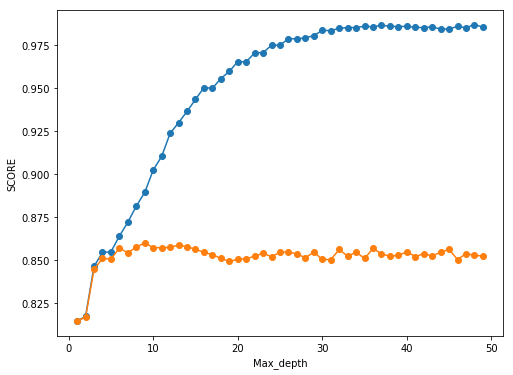

In [535]:
x=range(1,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("Max_depth")
plt.ylabel("SCORE")

In [539]:
clsfr=RandomForestClassifier(max_depth=8)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8815183688809546, 0.8582299887260428)

In [545]:
train_list=[]
test_list=[]
for i in range(2,50):
    clsfr=RandomForestClassifier(min_samples_split=i)
    clsfr.fit(train_x,train_y)
    train_score=clsfr.score(train_x,train_y)
    test_score=clsfr.score(test_x,test_y)
    train_list.append(train_score)
    test_list.append(test_score)

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\f

Text(0, 0.5, 'SCORE')

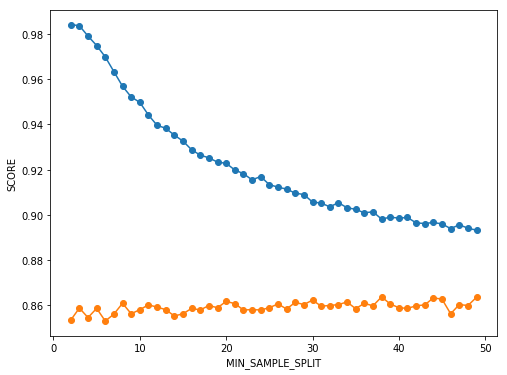

In [546]:
x=range(2,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("MIN_SAMPLE_SPLIT")
plt.ylabel("SCORE")

In [549]:
clsfr=RandomForestClassifier(min_samples_split=25)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.911209245513483, 0.8593573844419391)

In [553]:
clsfr=RandomForestClassifier(max_depth=8,min_samples_split=25)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8760217983651226, 0.8599210822998873)

In [554]:
train_list={}
test_list={}
c=0
for i in range(1,50):
    for j in range(2,50):
        clsfr=RandomForestClassifier(max_depth=i,min_samples_split=j)
        clsfr.fit(train_x,train_y)
        train_score=clsfr.score(train_x,train_y)
        test_score=clsfr.score(test_x,test_y)
        train_list[c]={"i":i,"j":j,"Score":train_score}
        test_list[c]={"i":i,"j":j,"Score":test_score}
        c+=1
        
        

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\f

KeyboardInterrupt: 

In [555]:
for i in range(1,972):
    for j in range(1,50):
        for k in range(2,50)
        lst.append(train_list[i][j][k])

{0: {'i': 1, 'j': 2, 'Score': 0.8146669172225877},
 1: {'i': 1, 'j': 3, 'Score': 0.8146669172225877},
 2: {'i': 1, 'j': 4, 'Score': 0.8146669172225877},
 3: {'i': 1, 'j': 5, 'Score': 0.8146669172225877},
 4: {'i': 1, 'j': 6, 'Score': 0.8146669172225877},
 5: {'i': 1, 'j': 7, 'Score': 0.8146669172225877},
 6: {'i': 1, 'j': 8, 'Score': 0.8146669172225877},
 7: {'i': 1, 'j': 9, 'Score': 0.8146669172225877},
 8: {'i': 1, 'j': 10, 'Score': 0.8146669172225877},
 9: {'i': 1, 'j': 11, 'Score': 0.8146669172225877},
 10: {'i': 1, 'j': 12, 'Score': 0.8295593347740299},
 11: {'i': 1, 'j': 13, 'Score': 0.8146669172225877},
 12: {'i': 1, 'j': 14, 'Score': 0.8146669172225877},
 13: {'i': 1, 'j': 15, 'Score': 0.8146669172225877},
 14: {'i': 1, 'j': 16, 'Score': 0.8146669172225877},
 15: {'i': 1, 'j': 17, 'Score': 0.8146669172225877},
 16: {'i': 1, 'j': 18, 'Score': 0.8146669172225877},
 17: {'i': 1, 'j': 19, 'Score': 0.8146669172225877},
 18: {'i': 1, 'j': 20, 'Score': 0.8146669172225877},
 19: {'i': 

In [556]:
test_list

{0: {'i': 1, 'j': 2, 'Score': 0.814684329199549},
 1: {'i': 1, 'j': 3, 'Score': 0.814684329199549},
 2: {'i': 1, 'j': 4, 'Score': 0.814684329199549},
 3: {'i': 1, 'j': 5, 'Score': 0.814684329199549},
 4: {'i': 1, 'j': 6, 'Score': 0.814684329199549},
 5: {'i': 1, 'j': 7, 'Score': 0.814684329199549},
 6: {'i': 1, 'j': 8, 'Score': 0.814684329199549},
 7: {'i': 1, 'j': 9, 'Score': 0.814684329199549},
 8: {'i': 1, 'j': 10, 'Score': 0.814684329199549},
 9: {'i': 1, 'j': 11, 'Score': 0.814684329199549},
 10: {'i': 1, 'j': 12, 'Score': 0.8338500563697858},
 11: {'i': 1, 'j': 13, 'Score': 0.814684329199549},
 12: {'i': 1, 'j': 14, 'Score': 0.814684329199549},
 13: {'i': 1, 'j': 15, 'Score': 0.814684329199549},
 14: {'i': 1, 'j': 16, 'Score': 0.814684329199549},
 15: {'i': 1, 'j': 17, 'Score': 0.814684329199549},
 16: {'i': 1, 'j': 18, 'Score': 0.814684329199549},
 17: {'i': 1, 'j': 19, 'Score': 0.814684329199549},
 18: {'i': 1, 'j': 20, 'Score': 0.814684329199549},
 19: {'i': 1, 'j': 21, 'Score

In [557]:
clsfr=RandomForestClassifier(max_depth=12,min_samples_split=49)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8860283754580476, 0.8603438556933484)

In [558]:
train_list=[]
test_list=[]
for i in range(2,50):
    clsfr=RandomForestClassifier(min_samples_leaf=i)
    clsfr.fit(train_x,train_y)
    train_score=clsfr.score(train_x,train_y)
    test_score=clsfr.score(test_x,test_y)
    train_list.append(train_score)
    test_list.append(test_score)
    

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\f

Text(0, 0.5, 'SCORE')

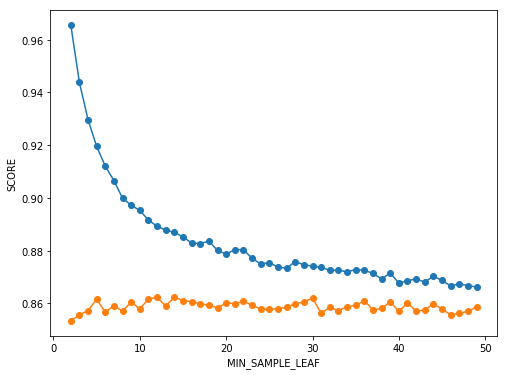

In [559]:
x=range(2,50)
plt.figure(figsize=(8,6))
plt.plot(x,train_list,marker="o")
plt.plot(x,test_list,marker="o")
plt.xlabel("MIN_SAMPLE_LEAF")
plt.ylabel("SCORE")

In [561]:
clsfr=RandomForestClassifier(min_samples_leaf=30)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8754110683078079, 0.8609075535512966)

In [562]:
clsfr=RandomForestClassifier(max_depth=12,min_samples_split=49,min_samples_leaf=30)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8728272103730151, 0.8556933483652762)

In [563]:
clsfr=RandomForestClassifier(max_depth=12,min_samples_split=49)
clsfr.fit(train_x,train_y)
train_score=clsfr.score(train_x,train_y)
test_score=clsfr.score(test_x,test_y)
train_score,test_score

C:\Users\ayushjha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.885558583106267, 0.8603438556933484)

In [564]:
## The Above Score looks the best score among all combinations